# Money Ball Assignment
Darwhin Gomez
Fall 2025   

## Introduction
This project applies multiple linear regression to historical baseball team data (1871–2006) in order to predict team wins over a standardized 162-game season. The dataset contains team-level batting, pitching, baserunning, and fielding statistics, offering a comprehensive view of performance factors that influence outcomes. By exploring, preparing, and modeling the data, the goal is to identify which variables most strongly impact team success, evaluate alternative regression models, and select the most accurate and interpretable model for predicting wins.

In [ ]:
from IPython.display import HTML

HTML('''
<style>
.jp-InputPrompt, .jp-CodeCell .jp-Cell-inputWrapper {
    display: none;
}
</style>
''')


### Data Exploration
    This section explores the size and variables in our training dataset moneyball-traiing-data.csv we will use python to explore the set.

Lets Load our Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

Import our data.

In [ ]:
train_data = pd.read_csv('moneyball-training-data.csv')
test_data = pd.read_csv('moneyball-evaluation-data.csv')



Columns in train

In [ ]:
for col in train_data.columns:
    print(col)

INDEX
TARGET_WINS
TEAM_BATTING_H
TEAM_BATTING_2B
TEAM_BATTING_3B
TEAM_BATTING_HR
TEAM_BATTING_BB
TEAM_BATTING_SO
TEAM_BASERUN_SB
TEAM_BASERUN_CS
TEAM_BATTING_HBP
TEAM_PITCHING_H
TEAM_PITCHING_HR
TEAM_PITCHING_BB
TEAM_PITCHING_SO
TEAM_FIELDING_E
TEAM_FIELDING_DP


Shape of train and test datas

In [ ]:
print("Train data shape (rows, cols): ",train_data.shape)
print("Test data shape (rows, cols): ",test_data.shape)
print("Ratio of test to train data: ",round(test_data.shape[0]/train_data.shape[0],4))




Train data shape (rows, cols):  (2276, 17)
Test data shape (rows, cols):  (259, 16)
Ratio of test to train data:  0.1138


Lets see some of the summary statististics

In [ ]:
summary = train_data.describe().T
summary['range'] = summary['max'] - summary['min']
summary['var'] = summary['std'] ** 2 
summary = summary[['min', 'max', 'mean', '50%', 'std', 'var', 'range']]
summary.columns = ['min', 'max', 'mean', 'median', 'std', 'var', 'range']
summary.drop(summary.index[0], inplace=True)


summary

,min,max,mean,median,std,var,range
TARGET_WINS,0.0,146.0,80.790861,82.0,15.752152,2.481303e+02,146.0
TEAM_BATTING_H,891.0,2554.0,1469.269772,1454.0,144.591195,2.090661e+04,1663.0
TEAM_BATTING_2B,69.0,458.0,241.246924,238.0,46.801415,2.190372e+03,389.0
TEAM_BATTING_3B,0.0,223.0,55.250000,47.0,27.938557,7.805630e+02,223.0
TEAM_BATTING_HR,0.0,264.0,99.612039,102.0,60.546872,3.665924e+03,264.0
TEAM_BATTING_BB,0.0,878.0,501.558875,512.0,122.670862,1.504814e+04,878.0
TEAM_BATTING_SO,0.0,1399.0,735.605336,750.0,248.526418,6.176538e+04,1399.0
TEAM_BASERUN_SB,0.0,697.0,124.761772,101.0,87.791166,7.707289e+03,697.0
TEAM_BASERUN_CS,0.0,201.0,52.803856,49.0,22.956338,5.269934e+02,201.0
TEAM_BATTING_HBP,29.0,95.0,59.356021,58.0,12.967123,1.681463e+02,66.0


Missingness

In [ ]:
train_data.isnull().sum()


INDEX                  0
TARGET_WINS            0
TEAM_BATTING_H         0
TEAM_BATTING_2B        0
TEAM_BATTING_3B        0
TEAM_BATTING_HR        0
TEAM_BATTING_BB        0
TEAM_BATTING_SO      102
TEAM_BASERUN_SB      131
TEAM_BASERUN_CS      772
TEAM_BATTING_HBP    2085
TEAM_PITCHING_H        0
TEAM_PITCHING_HR       0
TEAM_PITCHING_BB       0
TEAM_PITCHING_SO     102
TEAM_FIELDING_E        0
TEAM_FIELDING_DP     286
dtype: int64

In [ ]:
test_data.isnull().sum()

INDEX                 0
TEAM_BATTING_H        0
TEAM_BATTING_2B       0
TEAM_BATTING_3B       0
TEAM_BATTING_HR       0
TEAM_BATTING_BB       0
TEAM_BATTING_SO      18
TEAM_BASERUN_SB      13
TEAM_BASERUN_CS      87
TEAM_BATTING_HBP    240
TEAM_PITCHING_H       0
TEAM_PITCHING_HR      0
TEAM_PITCHING_BB      0
TEAM_PITCHING_SO     18
TEAM_FIELDING_E       0
TEAM_FIELDING_DP     31
dtype: int64

So we have missing data for fields, baseball didnt always track all the stats that the game has todays lets see if we can narrow down the years in which these stats are missing.

In [ ]:
missing_stats = train_data[
    train_data[['TEAM_BATTING_SO', 'TEAM_BASERUN_SB', 'TEAM_BASERUN_CS', 'TEAM_BATTING_HBP','TEAM_PITCHING_SO','TEAM_FIELDING_DP']].isnull().any(axis=1)
][['TEAM_BATTING_SO', 'TEAM_BASERUN_SB', 'TEAM_BASERUN_CS', 'TEAM_BATTING_HBP','TEAM_PITCHING_SO','TEAM_FIELDING_DP']]
print(missing_stats)

      TEAM_BATTING_SO  TEAM_BASERUN_SB  TEAM_BASERUN_CS  TEAM_BATTING_HBP  \
0               842.0              NaN              NaN               NaN   
1              1075.0             37.0             28.0               NaN   
2               917.0             46.0             27.0               NaN   
3               922.0             43.0             30.0               NaN   
4               920.0             49.0             39.0               NaN   
...               ...              ...              ...               ...   
2264           1014.0            135.0             55.0               NaN   
2265           1077.0            108.0             34.0               NaN   
2266           1058.0             91.0             46.0               NaN   
2267            939.0             70.0             51.0               NaN   
2275            969.0              NaN              NaN               NaN   

      TEAM_PITCHING_SO  TEAM_FIELDING_DP  
0               5456.0          

From research, we know that certain statistics were not officially tracked throughout the entire dataset. To address this, we replace missing values with the median of the corresponding variable. The reasoning is twofold: first, baseball seasons always average close to a .500 win percentage since there are no ties, and second, the median provides a central value between the minimum and maximum. This makes it a safer imputation choice than using 0 (which would artificially deflate the averages) or the mean (which could be skewed by extreme values).

In [ ]:
# Compute medians from training set only
train_medians = train_data.median(numeric_only=True)

# Apply to both datasets
train = train_data.fillna(train_medians)
test  = test_data.fillna(train_medians)


Checking for missingness now

In [ ]:
train.isnull().sum()

INDEX               0
TARGET_WINS         0
TEAM_BATTING_H      0
TEAM_BATTING_2B     0
TEAM_BATTING_3B     0
TEAM_BATTING_HR     0
TEAM_BATTING_BB     0
TEAM_BATTING_SO     0
TEAM_BASERUN_SB     0
TEAM_BASERUN_CS     0
TEAM_BATTING_HBP    0
TEAM_PITCHING_H     0
TEAM_PITCHING_HR    0
TEAM_PITCHING_BB    0
TEAM_PITCHING_SO    0
TEAM_FIELDING_E     0
TEAM_FIELDING_DP    0
dtype: int64

In [ ]:
test.isnull().sum()

INDEX               0
TEAM_BATTING_H      0
TEAM_BATTING_2B     0
TEAM_BATTING_3B     0
TEAM_BATTING_HR     0
TEAM_BATTING_BB     0
TEAM_BATTING_SO     0
TEAM_BASERUN_SB     0
TEAM_BASERUN_CS     0
TEAM_BATTING_HBP    0
TEAM_PITCHING_H     0
TEAM_PITCHING_HR    0
TEAM_PITCHING_BB    0
TEAM_PITCHING_SO    0
TEAM_FIELDING_E     0
TEAM_FIELDING_DP    0
dtype: int64

In [ ]:
summary = train.describe().T
summary['range'] = summary['max'] - summary['min']
summary['var'] = summary['std'] ** 2 
summary = summary[['min', 'max', 'mean', '50%', 'std', 'var', 'range']]
summary.columns = ['min', 'max', 'mean', 'median', 'std', 'var', 'range']
summary.drop(summary.index[0], inplace=True)


summary

,min,max,mean,median,std,var,range
TARGET_WINS,0.0,146.0,80.790861,82.0,15.752152,2.481303e+02,146.0
TEAM_BATTING_H,891.0,2554.0,1469.269772,1454.0,144.591195,2.090661e+04,1663.0
TEAM_BATTING_2B,69.0,458.0,241.246924,238.0,46.801415,2.190372e+03,389.0
TEAM_BATTING_3B,0.0,223.0,55.250000,47.0,27.938557,7.805630e+02,223.0
TEAM_BATTING_HR,0.0,264.0,99.612039,102.0,60.546872,3.665924e+03,264.0
TEAM_BATTING_BB,0.0,878.0,501.558875,512.0,122.670862,1.504814e+04,878.0
TEAM_BATTING_SO,0.0,1399.0,736.250439,750.0,242.909434,5.900499e+04,1399.0
TEAM_BASERUN_SB,0.0,697.0,123.394112,101.0,85.405653,7.294125e+03,697.0
TEAM_BASERUN_CS,0.0,201.0,51.513620,49.0,18.745872,3.514077e+02,201.0
TEAM_BATTING_HBP,29.0,95.0,58.113796,58.0,3.766219,1.418441e+01,66.0


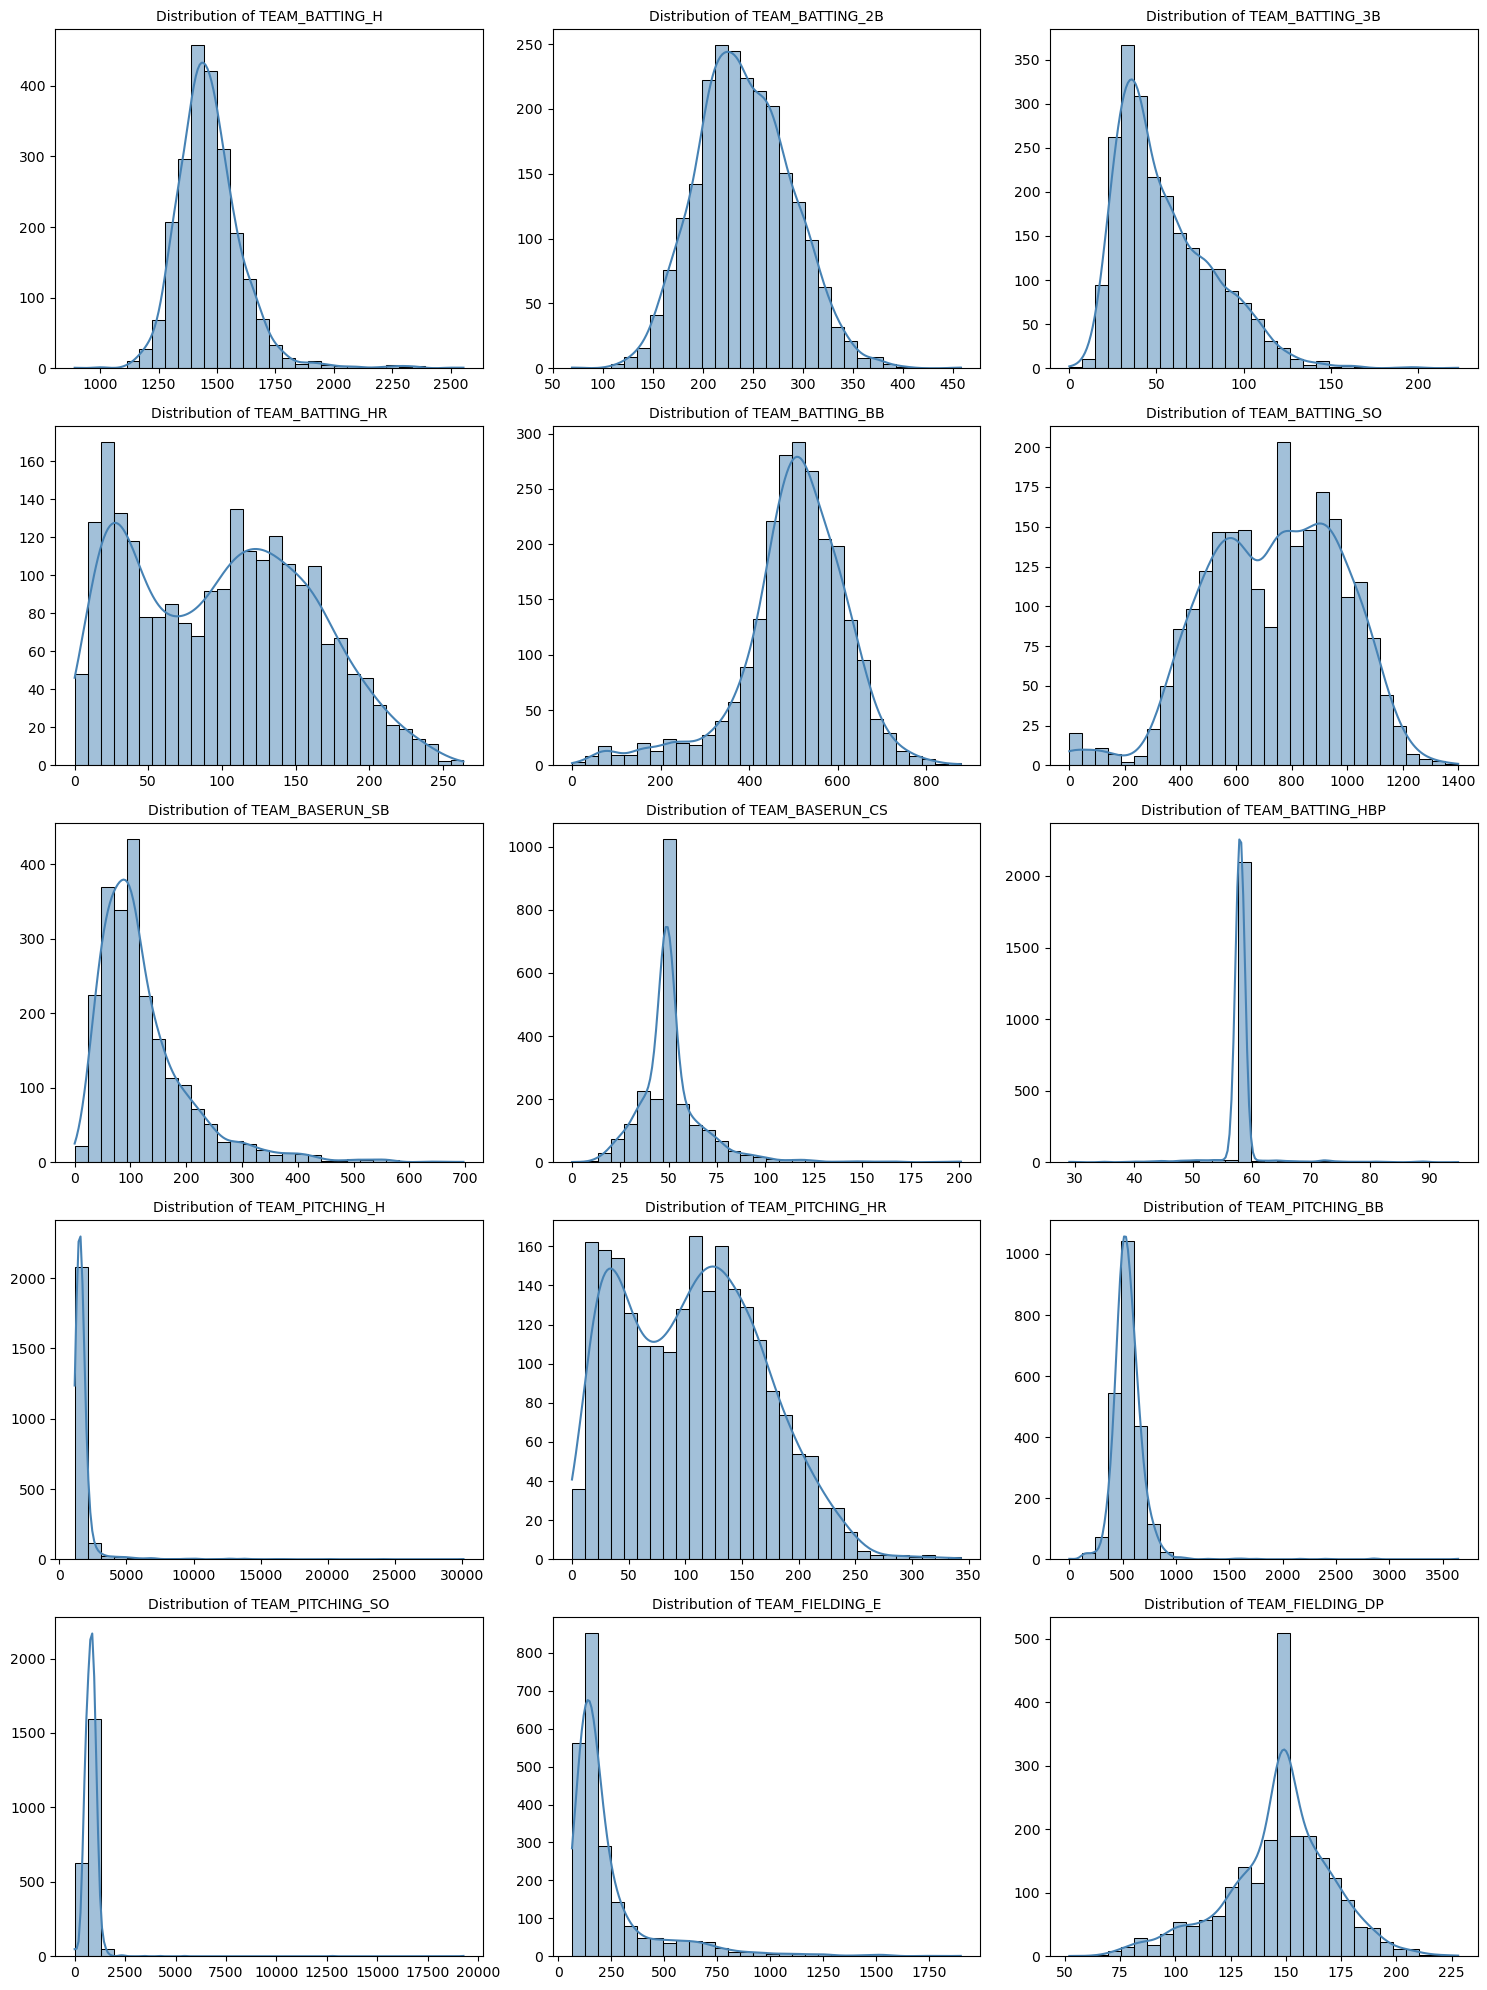

In [ ]:
cols = [
    "TEAM_BATTING_H","TEAM_BATTING_2B","TEAM_BATTING_3B","TEAM_BATTING_HR",
    "TEAM_BATTING_BB","TEAM_BATTING_SO","TEAM_BASERUN_SB","TEAM_BASERUN_CS",
    "TEAM_BATTING_HBP","TEAM_PITCHING_H","TEAM_PITCHING_HR","TEAM_PITCHING_BB",
    "TEAM_PITCHING_SO","TEAM_FIELDING_E","TEAM_FIELDING_DP"
]

plt.figure(figsize=(15, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(train[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

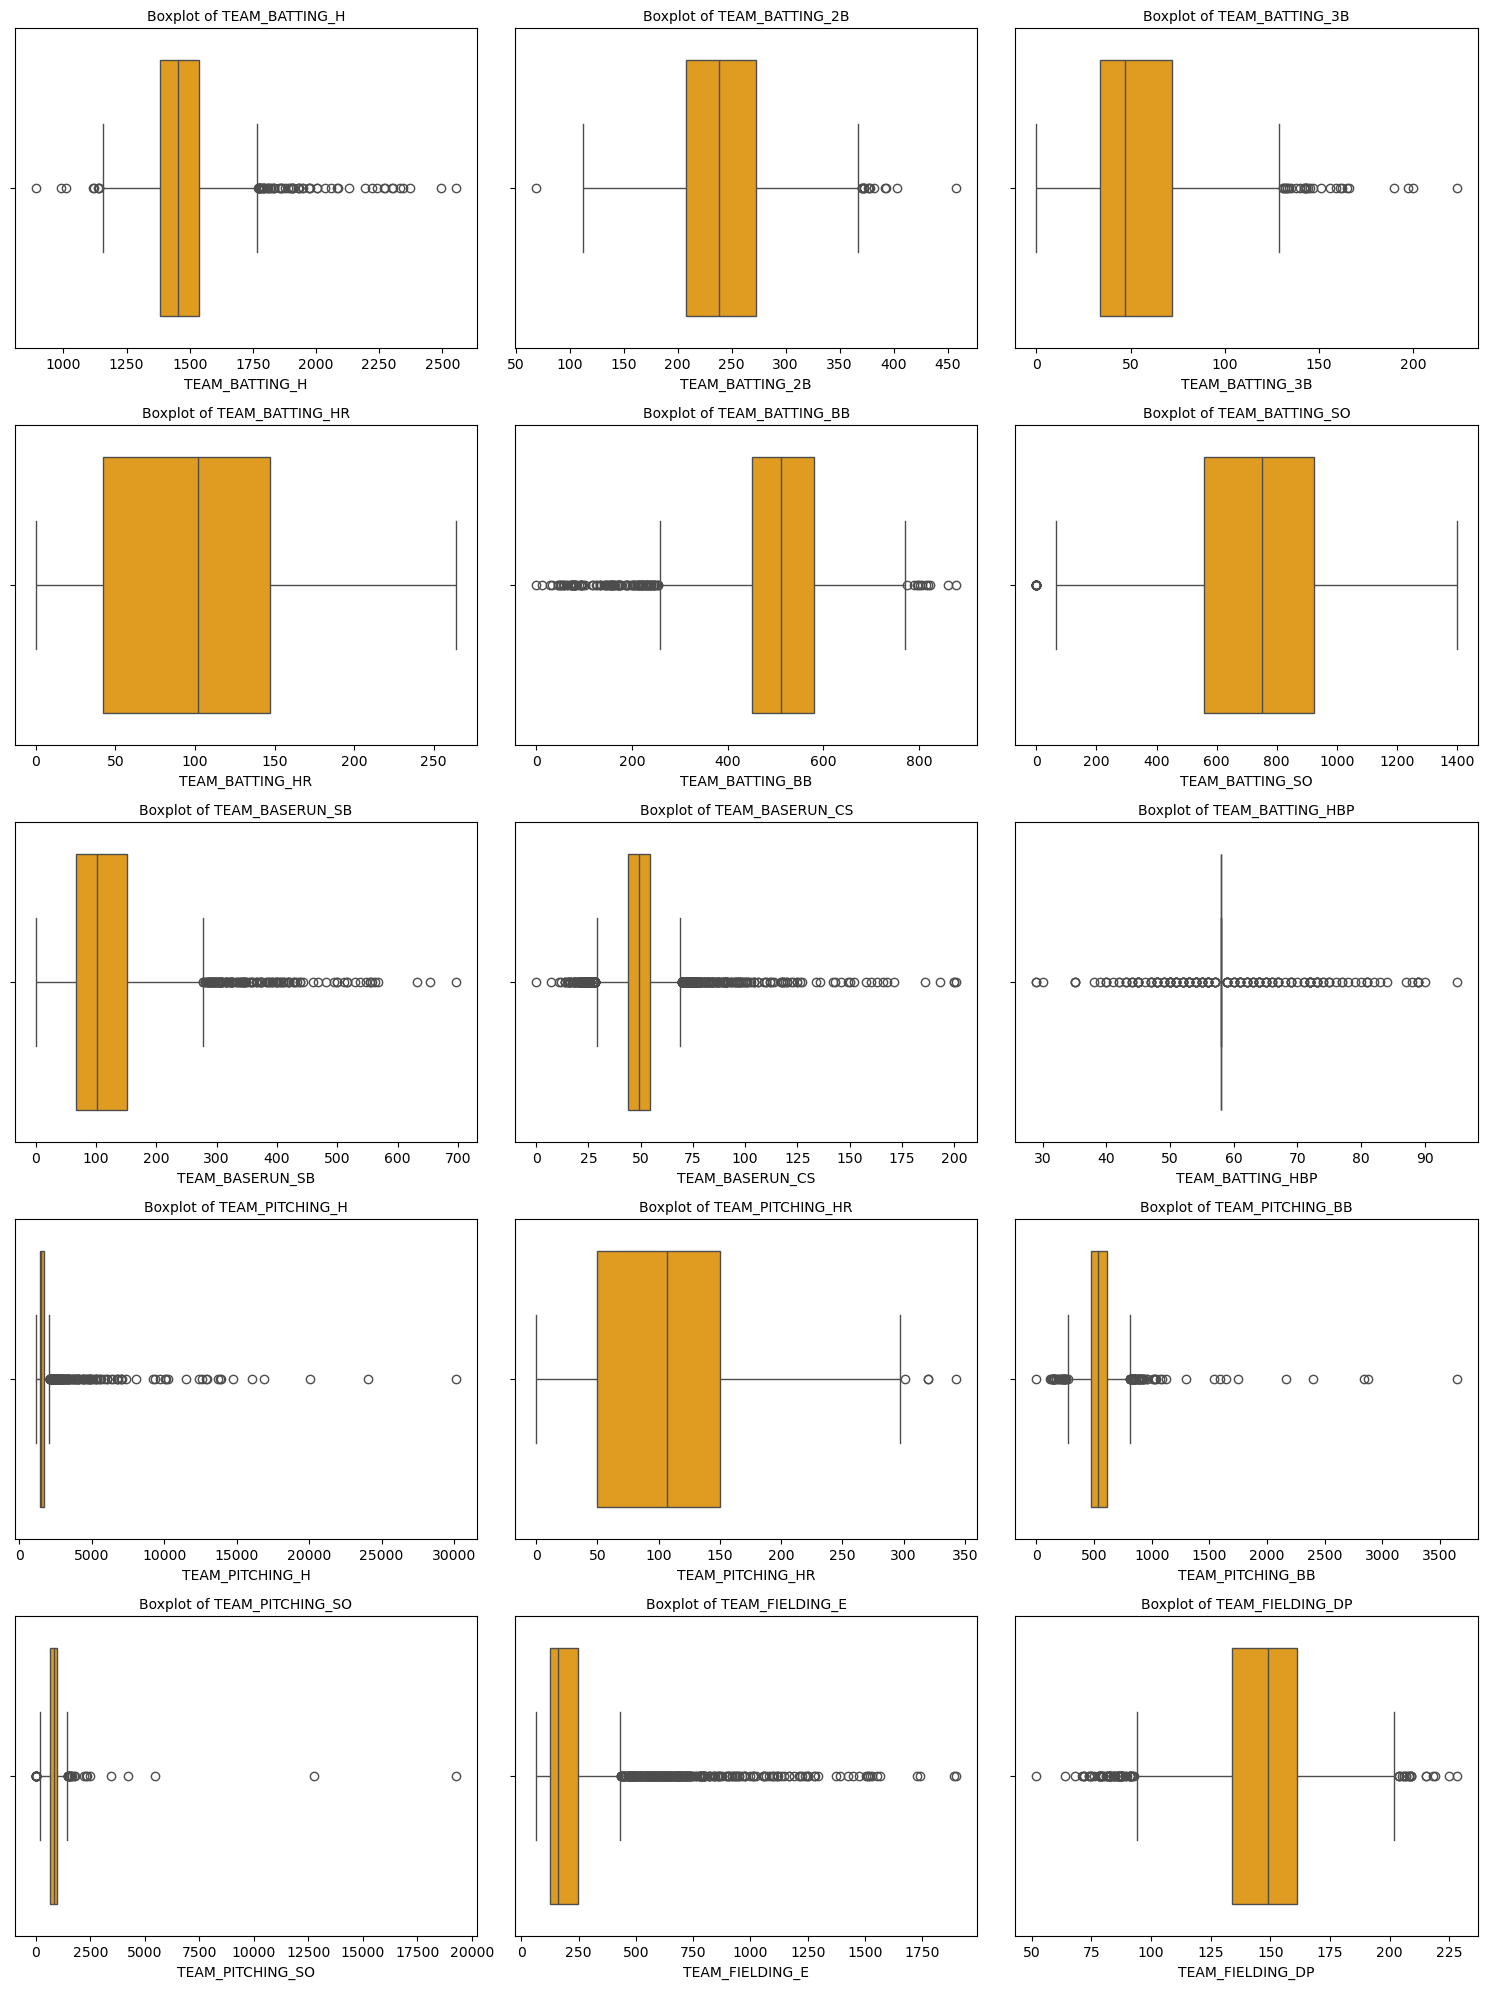

In [ ]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=train[col], color="orange")
    plt.title(f"Boxplot of {col}", fontsize=10)

plt.tight_layout()
plt.show()


TARGET_WINS         1.000000
TEAM_BATTING_H      0.388768
TEAM_BATTING_2B     0.289104
TEAM_BATTING_BB     0.232560
TEAM_PITCHING_HR    0.189014
TEAM_BATTING_HR     0.176153
TEAM_BATTING_3B     0.142608
TEAM_PITCHING_BB    0.124175
TEAM_BASERUN_SB     0.123611
TEAM_BATTING_HBP    0.016516
TEAM_BASERUN_CS     0.015960
INDEX              -0.021056
TEAM_FIELDING_DP   -0.030086
TEAM_BATTING_SO    -0.030581
TEAM_PITCHING_SO   -0.075800
TEAM_PITCHING_H    -0.109937
TEAM_FIELDING_E    -0.176485
Name: TARGET_WINS, dtype: float64


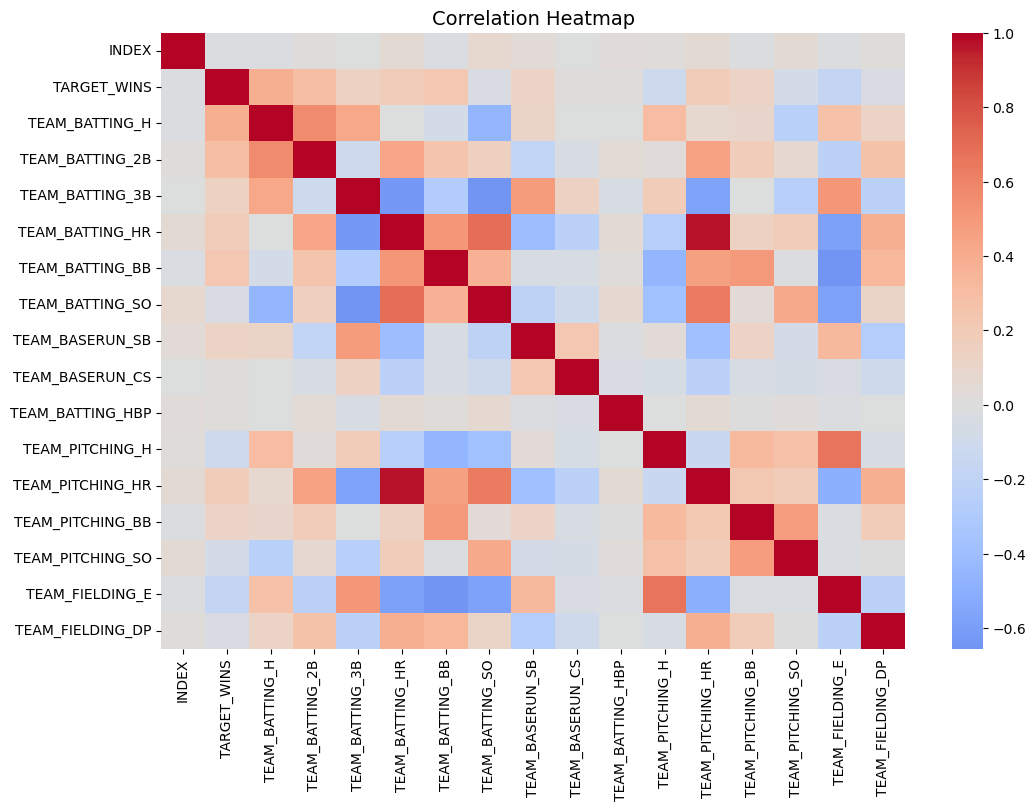

C:\Users\darwh\AppData\Local\Temp\ipykernel_25956\3850304831.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="colorblind", )


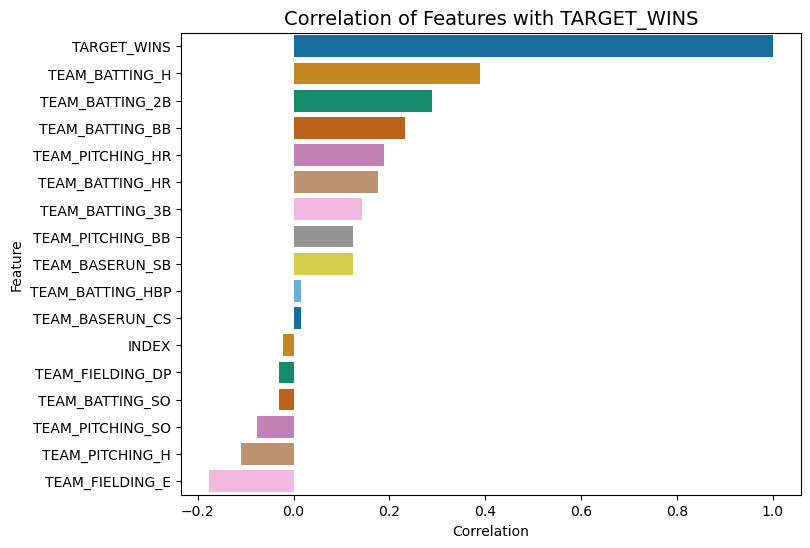

In [ ]:
corr = train.corr(numeric_only=True)

# Focus on correlation with TARGET_WINS
target_corr = corr['TARGET_WINS'].sort_values(ascending=False)
print(target_corr)

# Full heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Bar plot: Correlation with Wins
plt.figure(figsize=(8,6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="colorblind", )
plt.title("Correlation of Features with TARGET_WINS", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

## Data Processing
 We will center and scale our datas to prepare for regression modeling.

In [ ]:
# Separate features and target
X_train = train.drop(columns=['INDEX','TARGET_WINS'])
y_train = train['TARGET_WINS']

X_test = test.drop(columns=['INDEX','TARGET_WINS'], errors='ignore')

# Initialize scaler
scaler = StandardScaler()

# Fit on train, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert back to DataFrames for convenience
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Sanity check
print(X_train_scaled.mean().round(2))  # should be ~0
print(X_train_scaled.std().round(2))   # should be ~1

TEAM_BATTING_H     -0.0
TEAM_BATTING_2B     0.0
TEAM_BATTING_3B     0.0
TEAM_BATTING_HR    -0.0
TEAM_BATTING_BB    -0.0
TEAM_BATTING_SO     0.0
TEAM_BASERUN_SB     0.0
TEAM_BASERUN_CS     0.0
TEAM_BATTING_HBP    0.0
TEAM_PITCHING_H     0.0
TEAM_PITCHING_HR   -0.0
TEAM_PITCHING_BB   -0.0
TEAM_PITCHING_SO   -0.0
TEAM_FIELDING_E     0.0
TEAM_FIELDING_DP   -0.0
dtype: float64
TEAM_BATTING_H      1.0
TEAM_BATTING_2B     1.0
TEAM_BATTING_3B     1.0
TEAM_BATTING_HR     1.0
TEAM_BATTING_BB     1.0
TEAM_BATTING_SO     1.0
TEAM_BASERUN_SB     1.0
TEAM_BASERUN_CS     1.0
TEAM_BATTING_HBP    1.0
TEAM_PITCHING_H     1.0
TEAM_PITCHING_HR    1.0
TEAM_PITCHING_BB    1.0
TEAM_PITCHING_SO    1.0
TEAM_FIELDING_E     1.0
TEAM_FIELDING_DP    1.0
dtype: float64


We standardized all predictors by centering them around zero and scaling to unit variance. The scaler was fit on the training data only, and the same transformation was applied to the test set to avoid data leakage. This ensures all features contribute proportionally to the regression model regardless of their original scale.

## Modeling

In [ ]:
X_train_base = X_train_scaled
y_train_base = y_train

# Add intercept (statsmodels does not add it automatically)
X_train_sm = sm.add_constant(X_train_base)

# Fit OLS model
model1 = sm.OLS(y_train_base, X_train_sm).fit()

# Print summary (like R's lm())
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     69.45
Date:                Tue, 23 Sep 2025   Prob (F-statistic):          1.98e-173
Time:                        15:00:25   Log-Likelihood:                -9072.5
No. Observations:                2276   AIC:                         1.818e+04
Df Residuals:                    2260   BIC:                         1.827e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.7909      0.274  

c:\Users\darwh\anaconda33\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


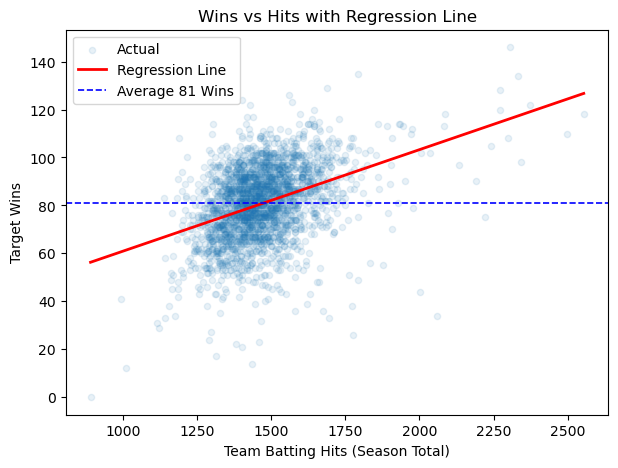

In [ ]:

X_hits = train[['TEAM_BATTING_H']]
y = train['TARGET_WINS']

# Fit linear regression
model_hits = LinearRegression()
model_hits.fit(X_hits, y)

# Predict line
x_range = np.linspace(X_hits.min(), X_hits.max(), 100).reshape(-1,1)
y_pred_line = model_hits.predict(x_range)

# Plot scatter and regression line
plt.figure(figsize=(7,5))
plt.scatter(X_hits, train['TARGET_WINS'], alpha=0.1, s=20, label="Actual")

plt.plot(x_range, y_pred_line, color="red", linewidth=2, label="Regression Line")

# Add horizontal line at 82 wins
plt.axhline(81, color="blue", linestyle="--", linewidth=1.2, label="Average 81 Wins")

plt.title("Wins vs Hits with Regression Line")
plt.xlabel("Team Batting Hits (Season Total)")
plt.ylabel("Target Wins")
plt.legend()
plt.show()


### Team batting hits, Strike outs and homeruns


In [ ]:
# Sele# Define predictors and target
X_top = train[['TEAM_BATTING_H', 'TEAM_BATTING_HR', 'TEAM_BATTING_SO']]
y = train['TARGET_WINS']

# Add intercept (statsmodels requires it explicitly)
X_top_sm = sm.add_constant(X_top)

# Fit OLS model
model_top = sm.OLS(y, X_top_sm).fit()

# Full regression summary
print(model_top.summary())




                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          3.38e-100
Time:                        01:12:49   Log-Likelihood:                -9271.6
No. Observations:                2276   AIC:                         1.855e+04
Df Residuals:                    2272   BIC:                         1.857e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7050      4.600     

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_sm = sm.add_constant(X[features])
        model = sm.OLS(y, X_sm).fit()
        p_values = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = p_values.max()
        if max_pval > significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Dropping {excluded_feature} (p={max_pval:.4f})")
            features.remove(excluded_feature)
        else:
            break
    return model, features

# Prepare predictors and target
X = train.drop(columns=['TARGET_WINS','INDEX'])
y = train['TARGET_WINS']

# Run backward elimination
model_backward, selected_vars = backward_elimination(X, y, significance_level=0.05)

print("\nSelected variables:", selected_vars)
print(model_backward.summary())

Dropping TEAM_PITCHING_BB (p=0.8547)
Dropping TEAM_BATTING_HBP (p=0.5223)
Dropping TEAM_BASERUN_CS (p=0.4811)
Dropping TEAM_PITCHING_HR (p=0.4771)

Selected variables: ['TEAM_BATTING_H', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_HR', 'TEAM_BATTING_BB', 'TEAM_BATTING_SO', 'TEAM_BASERUN_SB', 'TEAM_PITCHING_H', 'TEAM_PITCHING_SO', 'TEAM_FIELDING_E', 'TEAM_FIELDING_DP']
                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     94.68
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          5.31e-177
Time:                        01:12:56   Log-Likelihood:                -9073.2
No. Observations:                2276   AIC:                         1.817e+04
Df Residuals:                    2264   BIC:                        

## Select a Model

In [ ]:
X_test_selected = test[model_backward.model.exog_names[1:]]  # drop const
X_test_selected_sm = sm.add_constant(X_test_selected)

# Predictions
y_pred_test_backward = model_backward.predict(X_test_selected_sm)
print(y_pred_test_backward[:20])

0     63.961514
1     65.574980
2     75.246804
3     85.854244
4     66.632850
5     69.891454
6     78.210846
7     77.467617
8     71.120737
9     74.169310
10    69.835239
11    82.553109
12    82.133169
13    82.138754
14    84.623605
15    77.418825
16    74.792110
17    78.541607
18    73.134075
19    91.444958
dtype: float64


In [ ]:
# Get the predictors that survived backward elimination
X_train_selected = train[selected_vars]   # selected_vars returned from backward_elimination

# Add intercept (statsmodels requirement)
X_train_selected_sm = sm.add_constant(X_train_selected)

# Predictions on training data
y_pred_train_backward = model_backward.predict(X_train_selected_sm)

# Compare actual vs predicted
compare_train = pd.DataFrame({
    "Actual": train["TARGET_WINS"],
    "Predicted": y_pred_train_backward
})

print(compare_train.head(20))




    Actual  Predicted
0       39  61.143579
1       70  76.956695
2       86  76.522664
3       70  72.942068
4       82  68.182498
5       75  70.354023
6       80  67.358594
7       85  72.285276
8       86  74.449313
9       76  67.306596
10      78  70.413191
11      68  76.091056
12      72  73.211723
13      76  69.766816
14      74  81.384388
15      87  80.549353
16      88  87.701142
17      66  80.368075
18      75  76.442410
19      93  85.612144


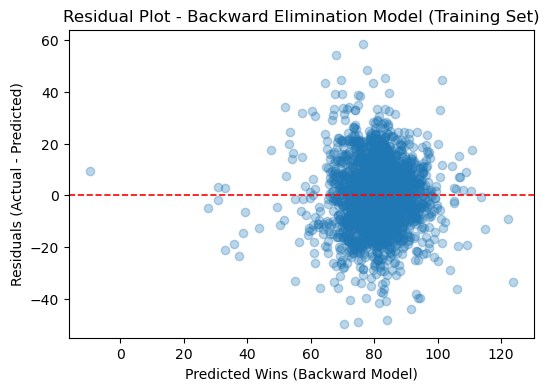

In [ ]:


# Training predictions
X_train_selected = train[selected_vars]
X_train_selected_sm = sm.add_constant(X_train_selected)
y_pred_train_backward = model_backward.predict(X_train_selected_sm)

# Residuals
residuals = train["TARGET_WINS"] - y_pred_train_backward

# Plot residuals vs fitted
plt.figure(figsize=(6,4))
plt.scatter(y_pred_train_backward, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', linewidth=1.2)
plt.xlabel("Predicted Wins (Backward Model)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Backward Elimination Model (Training Set)")
plt.show()



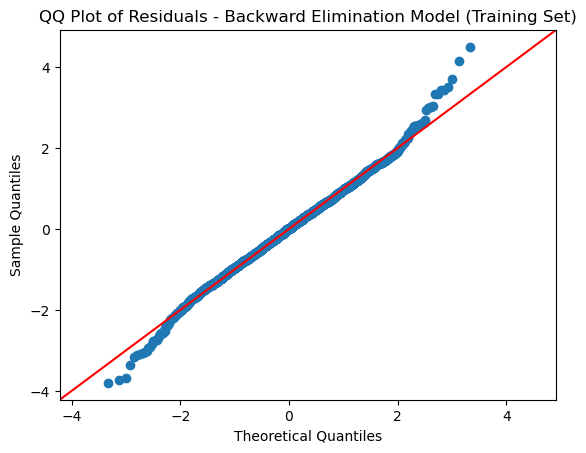

In [ ]:
# Training predictions (backward model)
X_train_selected = train[selected_vars]   # variables kept by backward elimination
X_train_selected_sm = sm.add_constant(X_train_selected)
y_pred_train_backward = model_backward.predict(X_train_selected_sm)

# Residuals
residuals = y_train_base - y_pred_train_backward

# QQ plot of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals - Backward Elimination Model (Training Set)")
plt.show()


In [ ]:
model_backward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TARGET_WINS   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     94.68
Date:                Wed, 24 Sep 2025   Prob (F-statistic):          5.31e-177
Time:                        01:25:51   Log-Likelihood:                -9073.2
No. Observations:                2276   AIC:                         1.817e+04
Df Residuals:                    2264   BIC:                         1.824e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.3440      5.234      4.269      0.000      12.080      32.608
TEAM_BATTING_H       0.0491      0.004     13.377      0.000       0.042       0.056
TEAM_BATTING_2B     -0.0214      0.009     -2.333      0.020      -0.039      -0.003
TEAM_BATTING_3B      0.0666      0.017      4.005      0.000       0.034       0.099
TEAM_BATTING_HR      0.0674      0.010      6.998      0.000       0.049       0.086
TEAM_BATTING_BB      0.0115      0.003      3.421      0.001       0.005       0.018
TEAM_BATTING_SO     -0.0085      0.002     -3.474      0.001      -0.013      -0.004
TEAM_BASERUN_SB      0.0249      0.004      5.920      0.000       0.017       0.033
TEAM_PITCHING_H     -0.0008      0.000     -2.421      0.016      -0.001      -0.000
TEAM_PITCHING_SO     0.0030      0.001      4.415      0.000       0.002       0.004
TEAM_FIELDING_E     -0.0190      0.002     -7.948      0.000      -0.024      -0.014
TEAM_FIELDING_DP    -0.1218      0.013     -9.419      0.000      -0.147      -0.096
==============================================================================
Omnibus:                       29.497   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.308
Skew:                           0.022   Prob(JB):                     7.22e-12
Kurtosis:                       3.734   Cond. No.                     5.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The backward elimination model retained 11 predictors and achieved an adjusted R² of 0.312, explaining about 31% of the variation in team wins. Offensive stats like hits, triples, home runs, walks, and stolen bases were positively associated with wins, while strikeouts, hits allowed, errors, and double plays reduced wins. Some coefficients (e.g., negative impact of doubles and double plays) are counterintuitive, likely due to multicollinearity among batting and fielding stats. Overall, the model is statistically significant (F(11, 2264) = 94.68, p < 0.001), but suffers from multicollinearity and moderate explanatory power. 